In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import d3rlpy
from d3rlpy.metrics.scorer import (
    average_value_estimation_scorer,
    td_error_scorer,
    evaluate_on_environment,
)
import seaborn as sns
import pandas as pd
import itertools

import warnings

warnings.filterwarnings("ignore")

import os

os.chdir("..")

from augmentation.augmented_dataset import MDPDatasetAugmented

In [4]:
os.environ["D4RL_SUPPRESS_IMPORT_ERROR"] = "1"

In [11]:
USE_GPU = False
AUGMENTATIONS = ["gaussian"]
# epochs per environment or per algorithm?
ENVS = [
    {"name": "cartpole-replay", "discrete": True, "epochs": 10},
    {"name": "door-human-v1", "discrete": False, "epochs": 10},
]
ALGOS_C = [
    {
        "algo_class": d3rlpy.algos.BCQ,
        "scorers": {
            "td_error": td_error_scorer,
            "value_scale": average_value_estimation_scorer,
        },
    },
    {
        "algo_class": d3rlpy.algos.CQL,
        "scorers": {
            "td_error": td_error_scorer,
            "value_scale": average_value_estimation_scorer,
        },
    },
]
ALGOS_D = [
    {
        "algo_class": d3rlpy.algos.DiscreteBCQ,
        "scorers": {
            "td_error": td_error_scorer,
            "value_scale": average_value_estimation_scorer,
        },
    },
    {
        "algo_class": d3rlpy.algos.DiscreteCQL,
        "scorers": {
            "td_error": td_error_scorer,
            "value_scale": average_value_estimation_scorer,
        },
    },
]

## Training with clean and augmented datasets

In [12]:
results = []
# TODO save best models
for env_item in ENVS:
    try:
        dataset, env = d3rlpy.datasets.get_dataset(env_item["name"])
    except ValueError:
        try:
            dataset, env = d3rlpy.datasets.get_d4rl(env_item["name"])
        except ValueError:
            continue
    augmented_dataset = MDPDatasetAugmented.from_mdpdataset(
        dataset, augmentations=AUGMENTATIONS
    )
    try_algos = ALGOS_D if env_item["discrete"] else ALGOS_C
    for algo_item in try_algos:
        algo = algo_item["algo_class"]
        agent_clean = algo(use_gpu=USE_GPU)
        agent_augmented = algo(use_gpu=USE_GPU)
        # clean training
        metrics_clean = agent_clean.fit(
            dataset,
            eval_episodes=dataset,
            n_epochs=env_item["epochs"],
            scorers=(
                algo_item["scorers"]
                | {"environment_reward": evaluate_on_environment(env, n_trials=2)}
            ),
            verbose=False,
            experiment_name="{}_{}_{}_clean".format(
                env_item["name"], algo.__name__, env_item["epochs"]
            ),
        )
        # augmented training
        metrics_augmented = agent_augmented.fit(
            augmented_dataset,
            eval_episodes=dataset,
            n_epochs=env_item["epochs"],
            scorers=(
                algo_item["scorers"]
                | {"environment_reward": evaluate_on_environment(env, n_trials=2)}
            ),
            verbose=False,
            experiment_name="{}_{}_{}_augmented".format(
                env_item["name"], algo.__name__, env_item["epochs"]
            ),
        )
        # easy pandasify
        for epoch, metric in metrics_clean:
            results.append(
                {
                    "env": env_item["name"],
                    "algo": "{}_clean".format(algo.__name__),
                    "epoch": epoch,
                }
                | metric
            )

        for epoch, metric in metrics_augmented:
            results.append(
                {
                    "env": env_item["name"],
                    "algo": "{}_augmented".format(algo.__name__),
                    "epoch": epoch,
                }
                | metric
            )

2022-05-29 13:18.25 [debug    ] RoundIterator is selected.
2022-05-29 13:18.25 [info     ] Directory is created at d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825
2022-05-29 13:18.25 [debug    ] Building models...
2022-05-29 13:18.25 [debug    ] Models have been built.


Epoch 1/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:18.51 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_3116.pt


Epoch 2/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:19.16 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_6232.pt


Epoch 3/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:19.44 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_9348.pt


Epoch 4/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:20.11 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_12464.pt


Epoch 5/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:20.38 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_15580.pt


Epoch 6/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:21.07 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_18696.pt


Epoch 7/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:21.37 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_21812.pt


Epoch 8/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:22.06 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_24928.pt


Epoch 9/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:22.36 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_28044.pt


Epoch 10/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:23.06 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_clean_20220529131825/model_31160.pt
2022-05-29 13:23.06 [debug    ] RoundIterator is selected.
2022-05-29 13:23.06 [info     ] Directory is created at d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306
2022-05-29 13:23.06 [debug    ] Building models...
2022-05-29 13:23.06 [debug    ] Models have been built.


Epoch 1/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:23.57 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_6233.pt


Epoch 2/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:24.47 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_12466.pt


Epoch 3/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:25.38 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_18699.pt


Epoch 4/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:26.26 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_24932.pt


Epoch 5/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:27.16 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_31165.pt


Epoch 6/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:28.06 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_37398.pt


Epoch 7/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:28.56 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_43631.pt


Epoch 8/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:29.47 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_49864.pt


Epoch 9/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:30.40 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_56097.pt


Epoch 10/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:31.28 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteBCQ_10_augmented_20220529132306/model_62330.pt
2022-05-29 13:31.28 [debug    ] RoundIterator is selected.
2022-05-29 13:31.28 [info     ] Directory is created at d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128
2022-05-29 13:31.28 [debug    ] Building models...
2022-05-29 13:31.28 [debug    ] Models have been built.


Epoch 1/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:31.57 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_3116.pt


Epoch 2/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:32.24 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_6232.pt


Epoch 3/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:32.51 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_9348.pt


Epoch 4/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:33.17 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_12464.pt


Epoch 5/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:33.45 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_15580.pt


Epoch 6/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:34.12 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_18696.pt


Epoch 7/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:34.39 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_21812.pt


Epoch 8/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:35.06 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_24928.pt


Epoch 9/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:35.33 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_28044.pt


Epoch 10/10:   0%|          | 0/3116 [00:00<?, ?it/s]

2022-05-29 13:36.00 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_clean_20220529133128/model_31160.pt
2022-05-29 13:36.00 [debug    ] RoundIterator is selected.
2022-05-29 13:36.00 [info     ] Directory is created at d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600
2022-05-29 13:36.00 [debug    ] Building models...
2022-05-29 13:36.00 [debug    ] Models have been built.


Epoch 1/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:36.48 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_6233.pt


Epoch 2/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:37.34 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_12466.pt


Epoch 3/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:38.20 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_18699.pt


Epoch 4/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:39.07 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_24932.pt


Epoch 5/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:39.53 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_31165.pt


Epoch 6/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:40.34 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_37398.pt


Epoch 7/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:41.11 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_43631.pt


Epoch 8/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:41.47 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_49864.pt


Epoch 9/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:42.23 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_56097.pt


Epoch 10/10:   0%|          | 0/6233 [00:00<?, ?it/s]

2022-05-29 13:42.59 [info     ] Model parameters are saved to d3rlpy_logs/cartpole-replay_DiscreteCQL_10_augmented_20220529133600/model_62330.pt


load datafile: 100%|██████████| 8/8 [00:00<00:00, 211.27it/s]

2022-05-29 13:43.00 [debug    ] RoundIterator is selected.
2022-05-29 13:43.00 [info     ] Directory is created at d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300
2022-05-29 13:43.00 [debug    ] Building models...
2022-05-29 13:43.00 [debug    ] Models have been built.


Epoch 1/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:43.35 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_67.pt


Epoch 2/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:44.15 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_134.pt


Epoch 3/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:45.01 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_201.pt


Epoch 4/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:45.44 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_268.pt


Epoch 5/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:46.27 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_335.pt


Epoch 6/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:47.10 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_402.pt


Epoch 7/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:47.53 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_469.pt


Epoch 8/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:48.36 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_536.pt


Epoch 9/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:49.19 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_603.pt


Epoch 10/10:   0%|          | 0/67 [00:00<?, ?it/s]

2022-05-29 13:50.03 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_clean_20220529134300/model_670.pt
2022-05-29 13:50.03 [debug    ] RoundIterator is selected.
2022-05-29 13:50.03 [info     ] Directory is created at d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003
2022-05-29 13:50.03 [debug    ] Building models...
2022-05-29 13:50.03 [debug    ] Models have been built.


Epoch 1/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:51.04 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_134.pt


Epoch 2/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:52.03 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_268.pt


Epoch 3/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:53.02 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_402.pt


Epoch 4/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:54.01 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_536.pt


Epoch 5/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:54.59 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_670.pt


Epoch 6/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:55.58 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_804.pt


Epoch 7/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:56.56 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_938.pt


Epoch 8/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:57.55 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_1072.pt


Epoch 9/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:58.54 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_1206.pt


Epoch 10/10:   0%|          | 0/134 [00:00<?, ?it/s]

2022-05-29 13:59.52 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_BCQ_10_augmented_20220529135003/model_1340.pt
2022-05-29 13:59.52 [debug    ] RoundIterator is selected.
2022-05-29 13:59.52 [info     ] Directory is created at d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952
2022-05-29 13:59.52 [debug    ] Building models...
2022-05-29 13:59.52 [debug    ] Models have been built.


Epoch 1/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:00.08 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_26.pt


Epoch 2/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:00.24 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_52.pt


Epoch 3/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:00.39 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_78.pt


Epoch 4/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:00.54 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_104.pt


Epoch 5/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:01.10 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_130.pt


Epoch 6/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:01.24 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_156.pt


Epoch 7/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:01.37 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_182.pt


Epoch 8/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:01.52 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_208.pt


Epoch 9/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:02.06 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_234.pt


Epoch 10/10:   0%|          | 0/26 [00:00<?, ?it/s]

2022-05-29 14:02.20 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_clean_20220529135952/model_260.pt
2022-05-29 14:02.20 [debug    ] RoundIterator is selected.
2022-05-29 14:02.20 [info     ] Directory is created at d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220
2022-05-29 14:02.20 [debug    ] Building models...
2022-05-29 14:02.20 [debug    ] Models have been built.


Epoch 1/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:02.48 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_52.pt


Epoch 2/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:03.14 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_104.pt


Epoch 3/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:03.40 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_156.pt


Epoch 4/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:04.07 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_208.pt


Epoch 5/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:04.34 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_260.pt


Epoch 6/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:05.00 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_312.pt


Epoch 7/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:05.27 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_364.pt


Epoch 8/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:05.53 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_416.pt


Epoch 9/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:06.18 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_468.pt


Epoch 10/10:   0%|          | 0/52 [00:00<?, ?it/s]

2022-05-29 14:06.45 [info     ] Model parameters are saved to d3rlpy_logs/door-human-v1_CQL_10_augmented_20220529140220/model_520.pt


## Comparing results

In [22]:
results_df = pd.DataFrame(results)
results_df.to_parquet("results/simple_results.parquet")

### TD error

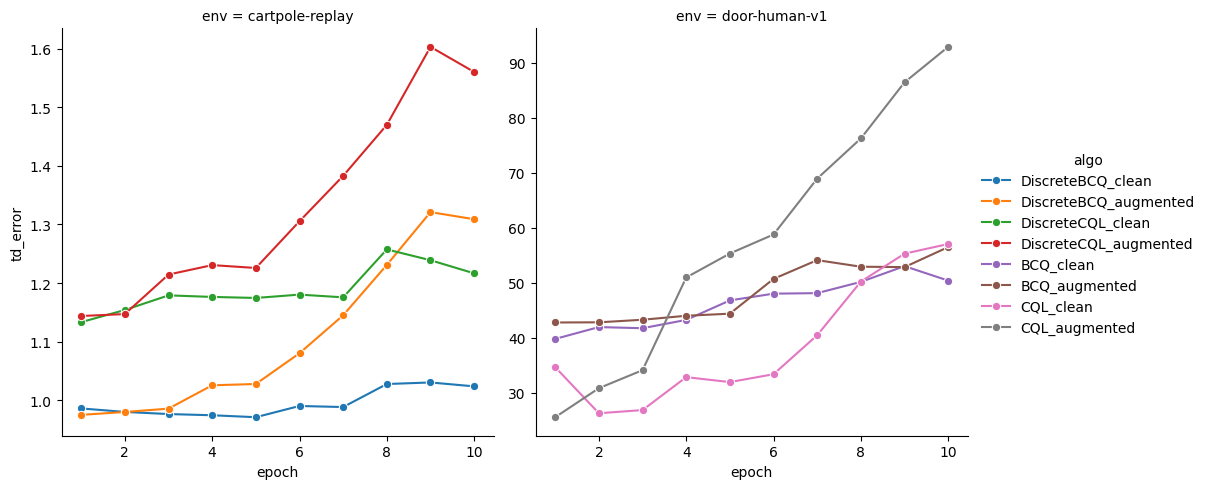

In [19]:
results_td = results_df[["env", "algo", "epoch", "td_error"]].dropna()
g = sns.FacetGrid(
    results_td,
    col="env",
    hue="algo",
    col_wrap=2,
    height=5,
    legend_out=True,
    sharey=False,
)
g.map_dataframe(sns.lineplot, "epoch", "td_error", marker="o")
g.add_legend()

### Expected value

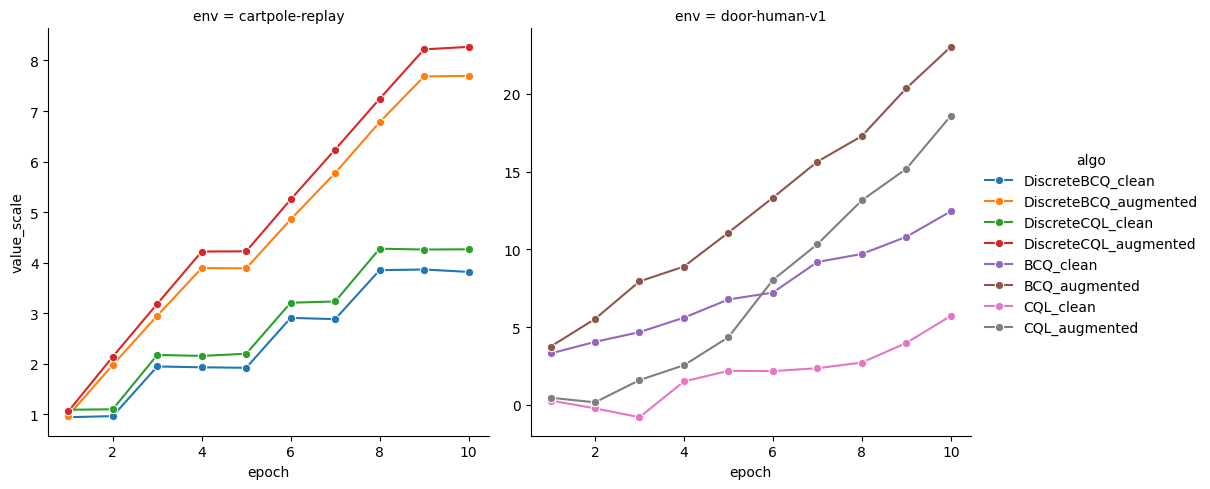

In [18]:
results_value = results_df[["env", "algo", "epoch", "value_scale"]].dropna()
g = sns.FacetGrid(
    results_value,
    col="env",
    hue="algo",
    col_wrap=2,
    height=5,
    legend_out=True,
    sharey=False,
)
g.map_dataframe(sns.lineplot, "epoch", "value_scale", marker="o")
g.add_legend()

### Environment reward

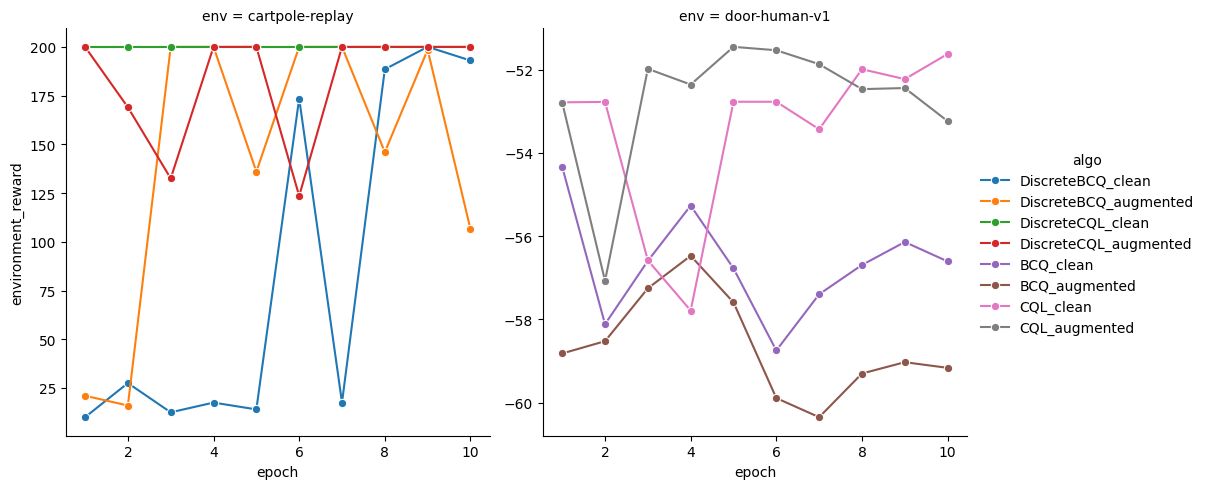

In [20]:
results_reward = results_df[["env", "algo", "epoch", "environment_reward"]].dropna()
g = sns.FacetGrid(
    results_reward,
    col="env",
    hue="algo",
    col_wrap=2,
    height=5,
    legend_out=True,
    sharey=False,
)
g.map_dataframe(sns.lineplot, "epoch", "environment_reward", marker="o")
g.add_legend()